In [105]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [114]:
#Set custom color palette
# colors = ['#f0f0f0', '#bdbdbd', '#636363']
# customPalette = sns.set_palette(sns.color_palette(colors, as_cmap = True))
df = pd.read_csv("BR20279856_cleaned.csv")

In [115]:
df.head()

,SAMPLE,Ag,As,Au,Ba,Be,Bi,Br,Ca,Cd,...,Tl,Tm,U,V,W,Y,Yb,Zn,Zr,Final pH
0,DESCRIPTION,ppb,ppb,ppb,ppb,ppb,ppb,ppm,ppm,ppb,...,ppb,ppb,ppb,ppb,ppb,ppb,ppb,ppb,ppb,Unity
1,S000 001,0.4,16.2,0.04,15700,21.5,1.9,0.48,294,7.7,...,0.64,36.6,45,32.6,0.1,1345,216,2410,19.1,6
2,S000 002,1,11.4,0.16,5260,67.6,1.1,0.97,50,5.2,...,0.13,32.4,96.1,46.2,0.1,2840,167,510,117,6.4
3,S000 003,12.2,3.8,0.4,4690,9.4,0.4,0.34,76.1,5.2,...,5.5,37.3,38.9,13.2,0.2,2040,208,110,19.9,6.4
4,S000 004,0.4,5,0.08,8370,16.6,1.4,0.2,281,9.8,...,1.92,17.1,21.6,33.5,0.2,522,96.6,950,33,6


In [116]:
# Converts ppm to ppb
ppm = []
for element in colName:
    if df[element].iloc[0] == 'ppm':
        ppm.append(element)
        # df[element] = df[element].apply(lambda x: x*1000)

df.drop(index = df.index[0], axis = 1, inplace = True)
df.drop('SAMPLE', axis = 1, inplace = True)

for c in df.columns:
    df[c] = df[c].astype(float)

In [117]:
for element in ppm:
    df[element] = df[element].apply(lambda x: x*1000)

In [4]:
# ticks = ax.set_xticks([0, 250, 500, 750, 1000])
# labels = ax.set_xticklabels(["one", "two", "three", "four", "five"], rotation=30, fontsize=8)

In [118]:
corr_matrix = df.corr(method='spearman', numeric_only = False)

In [119]:
# Most of the time people use 85% as a threshold
def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of correlated columns
    corr_matrix = dataset.corr(method='spearman', numeric_only = False)
    
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [120]:
col_corr = correlation(df, 0.9)
# Converts col_corr from set to list
list_col_corr = list(col_corr)

In [121]:
# Put it into a dataframe
corr_df = df[list_col_corr] 

In [122]:
# Visualise multiple columns against a single column
corr_matrix[['Er']]

,Er
Ag,0.288571
As,-0.293219
Au,0.394311
Ba,0.150600
Be,0.259586
...,...
Y,0.969046
Yb,0.980981
Zn,0.387006
Zr,-0.156769


In [123]:
corr_df_matrix = corr_df.corr(method='spearman', numeric_only = False)

In [128]:
# Pick a column in corr_df to visualise against 
corr_df_matrix.columns

Index(['Pr', 'Tb', 'Zr', 'Y', 'Ho', 'La', 'Lu', 'Tm', 'Yb', 'Gd', 'Ti', 'Sm',
       'Sr', 'Eu', 'Nd', 'Er'],
      dtype='object')

In [125]:
selected_element = 'Er'

In [126]:
# Give them a dropdown box 

In [131]:
corr_df_matrix[[selected_element]].sort_values('Er',ascending = True)


,Er
Ti,-0.283146
Zr,-0.156769
Sr,0.177296
La,0.553597
Pr,0.672447
Nd,0.719119
Sm,0.768312
Eu,0.793396
Gd,0.821414
Tb,0.910701


In [132]:
# Filter dataframe based on pos / neg correlation 
neg_corr_df = corr_df_matrix[corr_df_matrix[[selected_element]] < 0]
pos_corr_df = corr_df_matrix[corr_df_matrix[[selected_element]] >= 0]

neg_corr_df.dropna(how = 'all', inplace = True)
neg_corr_df = neg_corr_df[[selected_element]]
pos_corr_df.dropna(how = 'all', inplace = True)
pos_corr_df = pos_corr_df[[selected_element]]

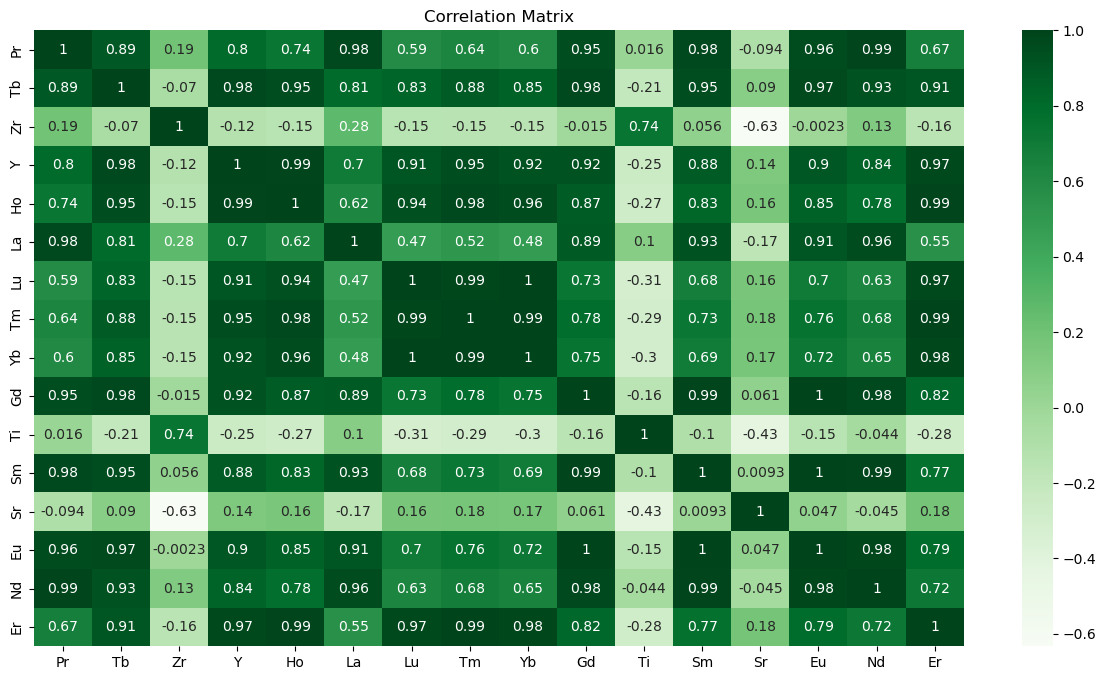

In [144]:
fig=plt.figure(figsize=(15,8),facecolor='white')
sns.heatmap(corr_df_matrix, annot = True, cmap = 'Greens')
plt.title(f"Correlation Matrix")
plt.show()

## Positive Correlation

In [134]:
# palette = sns.color_palette("light:#5A9", as_cmap=True)
custom_palette = sns.color_palette("bright")

In [ ]:
pos_corr_df = pos_corr_df.sort_values(by = selected_element, ascending = True).reset_index()
pos_corr_df.columns=['Feature','Correlation']

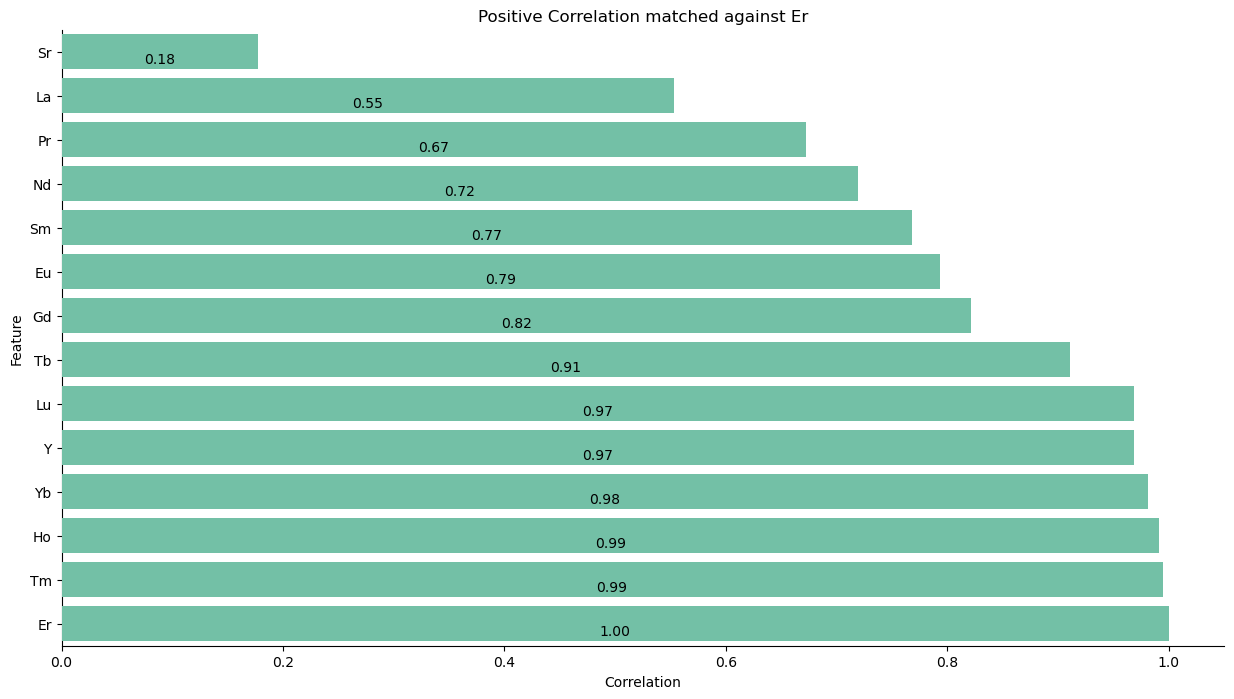

In [155]:
# Correlation with selected variable
fig=plt.figure(figsize=(15,8),facecolor='white')

ax0=fig.add_subplot(1,1,1)
ax0.grid(axis='y', color='gray', linestyle=':', dashes=(3,10))

palette=["mediumaquamarine" for i in range(16)]
# palette[2]='gold'
# palette[4]='gold'
barplot = sns.barplot(x='Correlation', y='Feature', data=pos_corr_df, palette = palette, zorder=3)
plt.bar_label(barplot.containers[0], fmt = '\n%.2f', label_type = 'center')

# Remove top and right borders
ax0.spines['top'].set_visible(False)
ax0.spines['right'].set_visible(False)

# ax0.grid(axis='y', zorder=0, color='gray', linestyle=':', dashes=(3,10))
plt.title(f"Positive Correlation matched against {selected_element}")
plt.show()

In [137]:
pos_corr_df.columns

Index(['Feature', 'Correlation'], dtype='object')

## Negative Correlation

In [152]:
neg_corr_df = neg_corr_df.sort_values(by = selected_element, ascending = False).reset_index()
neg_corr_df.columns=['Feature','Correlation']

KeyError: 'Er'

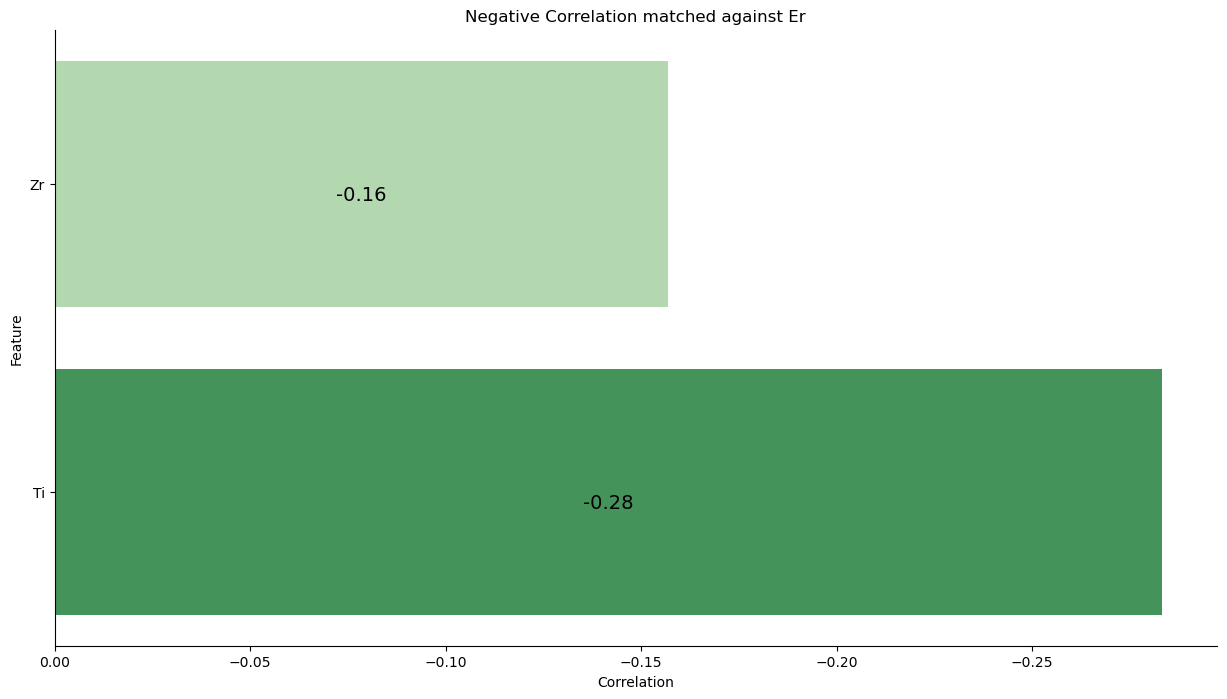

In [154]:
# Correlation with selected variable
fig=plt.figure(figsize=(15,8),facecolor='white')

ax0=fig.add_subplot(1,1,1)
ax0.grid(axis='y', color='gray', linestyle=':', dashes=(3,10))


# palette=["mediumaquamarine" for i in range(16)]
# palette[2]='gold'
# palette[4]='gold'
barplot = sns.barplot(x='Correlation', y='Feature', data=neg_corr_df, palette = "Greens")
plt.bar_label(barplot.containers[0], fmt = '\n%.2f', size = 14, label_type = 'center')

# Remove top and right borders
ax0.spines['top'].set_visible(False)
ax0.spines['right'].set_visible(False)

# ax0.grid(axis='y', zorder=0, color='gray', linestyle=':', dashes=(3,10))
plt.title(f"Negative Correlation matched against {selected_element}")
ax0.invert_xaxis()
plt.show()

## Combo Plot

## Top 5 Positive Correlation Boxplot 

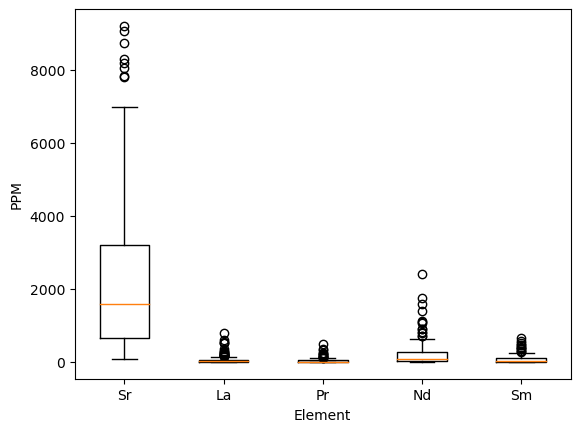

In [140]:
PosT5Elements = pos_corr_df['Feature'].iloc[0:5].values

fig, ax = plt.subplots()

ax.boxplot(df[PosT5Elements])
ax.set_xticklabels(PosT5Elements)
ax.set_title
ax.set_xlabel('Element')
ax.set_ylabel('PPM')
plt.show()

## Top 5 Negative Correlation Boxplot

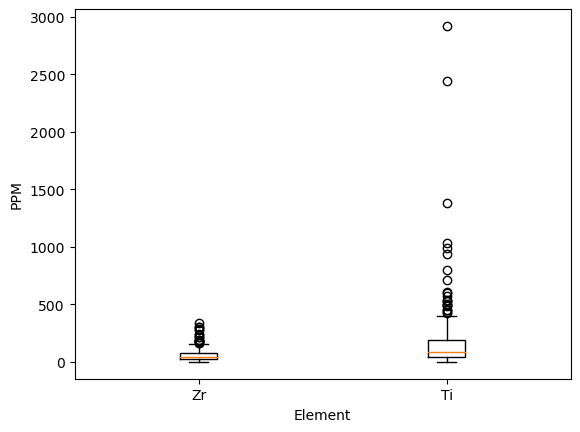

In [141]:
NegT5Elements = neg_corr_df['Feature'].iloc[0:5].values

fig, ax = plt.subplots()

ax.boxplot(df[NegT5Elements])
ax.set_xticklabels(NegT5Elements)
ax.set_title
ax.set_xlabel('Element')
ax.set_ylabel('PPM')
plt.show()